Separar datasets de treinamento e teste, separar as features que serão utilizadas.
Preencher nan com a média de valores da coluna.  // Testar também normalização [0;pi]

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("../dataset/train_normalized.csv")
test = pd.read_csv("../dataset/test_normalized.csv")

In [3]:
y_train = train['label']
y_test = test['label']

## FEATURE SELECTION

In [4]:
selected_features = ["proto", "orig_bytes", "conn_state", "resp_pkts", "resp_ip_bytes"]
num_features = len(selected_features)

In [5]:
train = train[selected_features]
test = test[selected_features]

In [6]:
train.head(5)

,proto,orig_bytes,conn_state,resp_pkts,resp_ip_bytes
0,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
1,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
2,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
3,0.5,0.000000e+00,0.000000,0.000000,0.000000e+00
4,0.5,2.382635e-07,0.833333,0.000017,6.178160e-07


Definir o Label para treinamento (característica que se quer prever)

## FEATURE MAP

ZZFeatureMap, ZFeatureMap, PauliFeatureMap (rodar com diferentes feature maps)

https://docs.quantum.ibm.com/api/qiskit/0.19/qiskit.circuit.library.PauliFeatureMap

#### ZZFeatureMap
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap

Nº de features = tamanho do vetor de features

FeatureMap = ZZFeatureMap com dimensões nº de features e 1 repetição

Decompose e draw FeatureMap, output "mpl", fold = 40

In [7]:
from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(num_features, reps = 1)

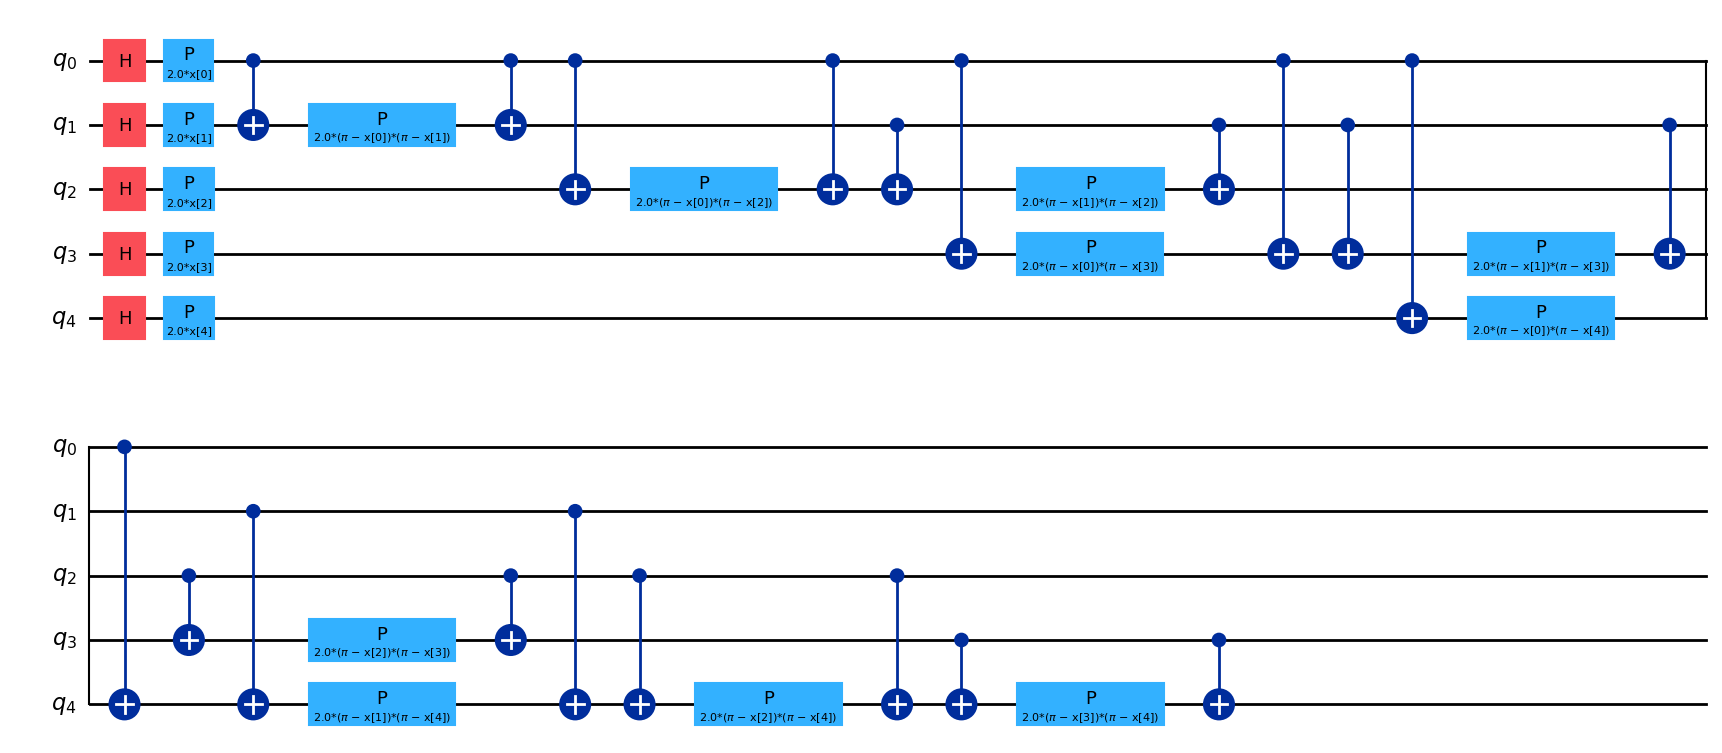

In [8]:
feature_map.decompose().draw(output = "mpl", fold = 25)

## Ansatz

#### TwoLocal
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.TwoLocal -> ENTENDER MELHOR

TwoLocal.__Subclasses__() -> Ansatz = RealAmplitudes com nº de qubits = nº de features e 2 repetições

Decompose e draw Ansatz, output "mpl", fold = 20

In [9]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_features, reps = 2)

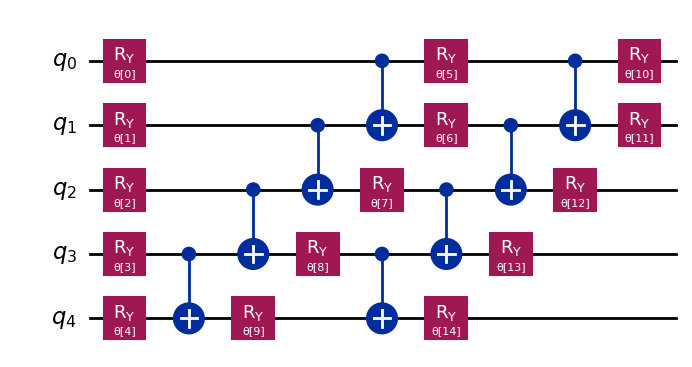

In [10]:
ansatz.decompose().draw(output = "mpl", fold = 40)

## Callback Function
Importar pyplot para plotar gráfico da função custo pelas iterações - callback_graph

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
objective_func_vals_adam = []
plt.rcParams["figure.figsize"]= (12,6)

def callback_graph(weights, obj_func_eval): #
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Função de Custo")
    plt.xlabel("Iterações")
    plt.ylabel("Função de Custo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

def callback_graph_adam(n_iter, weights, obj_func_eval):
    """
    ADAM will call this with
      n_iter        : int, the current iteration (0, 1, 2, …)
      weights       : np.ndarray, the current parameter vector
      obj_func_eval : float,   the cost at that parameter vector
    """
    # erase previous plot
    clear_output(wait=True)

    # store and plot
    objective_func_vals_adam.append(obj_func_eval)
    plt.plot(objective_func_vals_adam, linewidth=2)
    plt.title("Função de Custo")
    plt.xlabel("Iterações")
    plt.ylabel("Função de Custo")
    plt.grid(True)
    plt.show()

## OTIMIZADOR

#### ADAM
Importar o ADAM da biblioteca Keras - https://keras.io/api/optimizers/adam/

Rodar com configurações padrão.

In [12]:
from qiskit_machine_learning.optimizers import ADAM
optimizer = ADAM(maxiter=100, callback=callback_graph_adam)


## VQC
Importar classificador VQC do Qiskit -> https://github.com/qiskit-community/qiskit-machine-learning // https://qiskit-community.github.io/qiskit-machine-learning/getting_started.html#installation

VQC { sampler = sampler; feature_map = feature_map, ansatz = ansatz; optimizer = optimizer; callback = callback_graph }

Importar time para visualizar o tempo de execução

VQC.fit(train_features, train_labels.values)

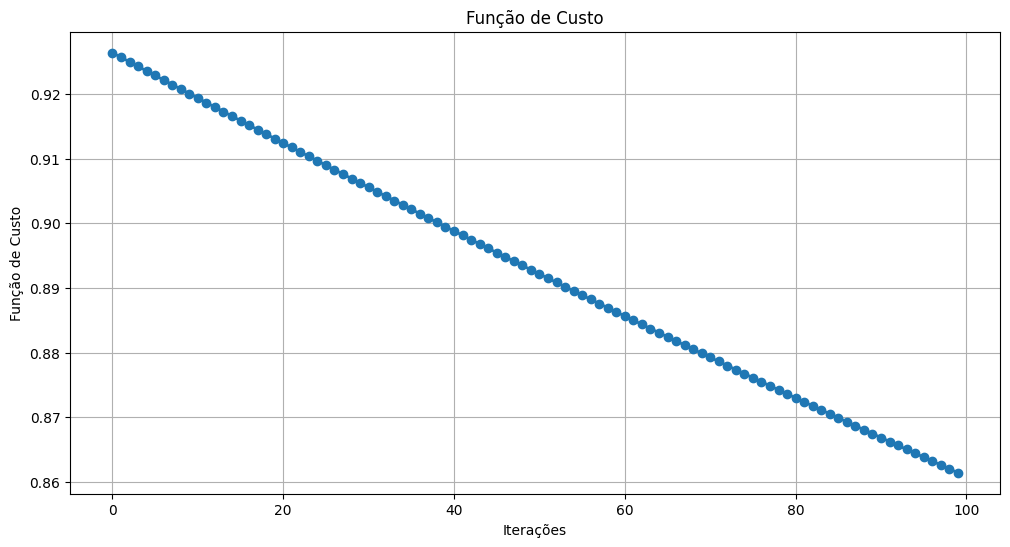

Training time: 162809 seconds


In [13]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_aer import *
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

sim = AerSimulator(method='statevector', device='GPU')

vqc = VQC(
    #sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    #callback=callback_graph,
    pass_manager=generate_preset_pass_manager(backend=sim)
)

start = time.time()
vqc.fit(train, y_train.values)
elapsed = time.time() - start

vqc.save("vqc_cobyla_zz")


print(f"Training time: {round(elapsed)} seconds")

In [27]:
print(objective_func_vals_adam)
differences = [objective_func_vals_adam[i] - objective_func_vals_adam[i+1] for i in range(len(objective_func_vals_adam)-1)]

[0.9263731101547852, 0.9256688388547363, 0.924965099922453, 0.9242619172526434, 0.9235593141231766, 0.9228573132231159, 0.9221559366470243, 0.9214552058824842, 0.9207551417981445, 0.920055764635079, 0.9193570940029617, 0.918659148881947, 0.9179619476309284, 0.9172655080025657, 0.9165698471653396, 0.9158749817326209, 0.9151809277985264, 0.9144877009801107, 0.9137953164650876, 0.9131037890641154, 0.9124131332663125, 0.9117233632965186, 0.9110344931725772, 0.910346536760831, 0.9096595078279488, 0.908973420087275, 0.9082882872380044, 0.9076041229957484, 0.9069209411133394, 0.9062387553911193, 0.9055575796764004, 0.9048774278521777, 0.9041983138156899, 0.903520251447769, 0.9028432545743041, 0.9021673369214269, 0.9014925120661851, 0.900818793384592, 0.9001461939989124, 0.8994747267259373, 0.8988044040278338, 0.8981352379668475, 0.8974672401648901, 0.8968004217686335, 0.8961347934204267, 0.8954703652350208, 0.8948071467817549, 0.894145147071651, 0.8934843745486715, 0.8928248370843078, 0.89216

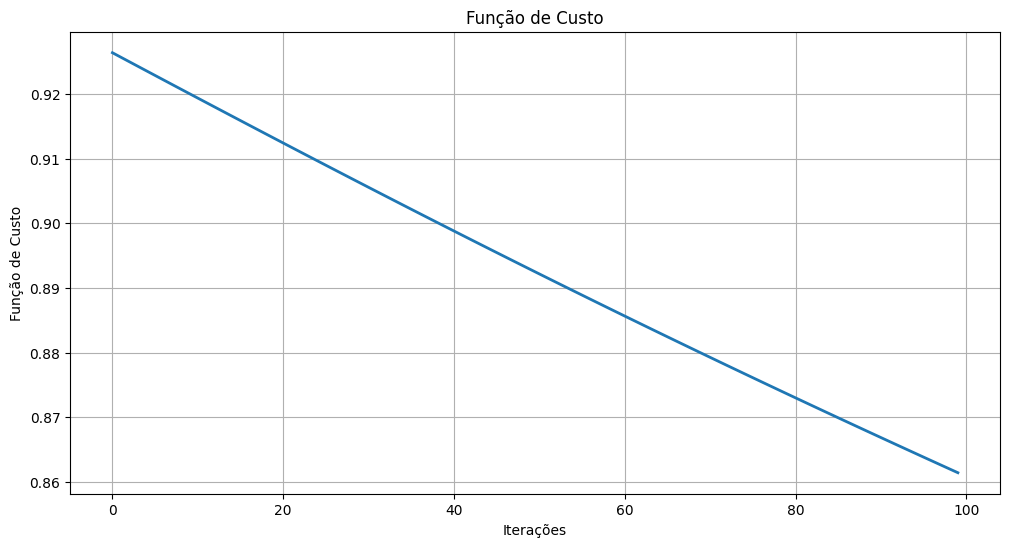

In [ ]:

plt.plot(objective_func_vals_adam, linewidth=2)
plt.title("Função de Custo")
plt.xlabel("Iterações")
plt.ylabel("Função de Custo")
plt.grid(True)
plt.show()

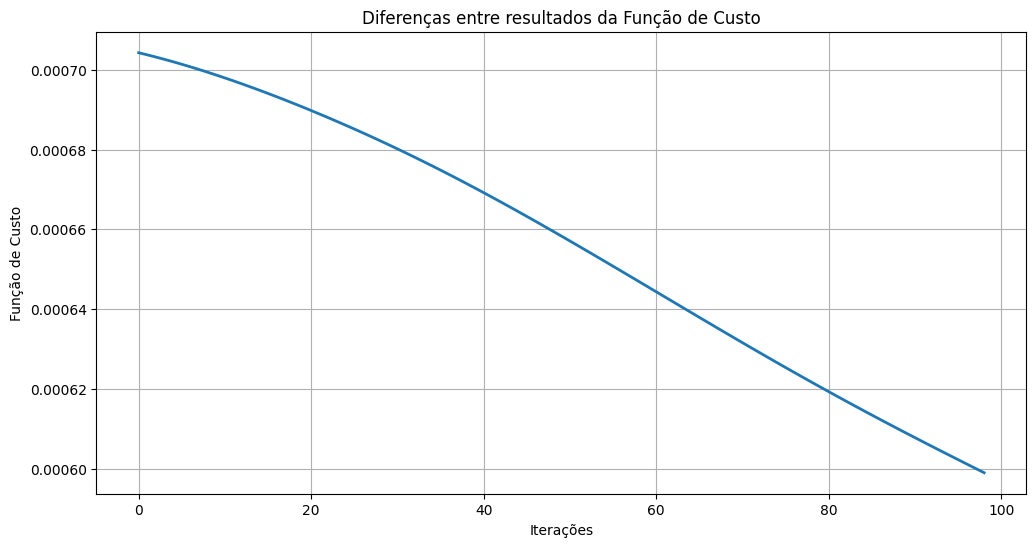

In [ ]:
differences = [objective_func_vals_adam[i] - objective_func_vals_adam[i+1] for i in range(len(objective_func_vals_adam)-1)]

plt.plot(differences, linewidth=2)
plt.title("Diferenças entre resultados da Função de Custo")
plt.xlabel("Iterações")
plt.ylabel("Função de Custo")
plt.grid(True)
plt.show()

In [14]:
print(objective_func_vals)

[]


In [15]:
train_acc = vqc.score(train, y_train)
print(f'Acuracia: {round(train_acc,2)*100}%')

Acuracia: 81.0%


Rodar com o teste -> VQC.predict(test);

Realizar avaliação dos resultados (acurácia, precisão, recall...)

In [16]:
y_predicted = vqc.predict(test)

y_predicted

array([1., 1., 1., ..., 1., 1., 1.])

In [17]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.41      0.58      6575
         1.0       0.78      1.00      0.88     13655

    accuracy                           0.81     20230
   macro avg       0.89      0.70      0.73     20230
weighted avg       0.85      0.81      0.78     20230



In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
print(confusion_matrix)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()

print(tn, fp, fn, tp)

[[ 2678  3897]
 [    2 13653]]
2678 3897 2 13653
